In [1]:
import jax.numpy as jnp
from jax import jit
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
plt.style.use('bmh')

/home/kawahara/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#https://en.wikipedia.org/wiki/Test_functions_for_optimization

@jit
def spherical(x,y):
    f=(x**2+y**2) 
    return f

@jit
def booth(x,y):
    f=(x+2.*y-7.)**2 + (2.*x+y-5.)**2
    return f

@jit
def beale(x,y):
    f=(1.5-x+x*y)**2 
    + (2.25-x+x*y*y)**2 
    + (2.625-x+x*y*y*y)**2
    return f


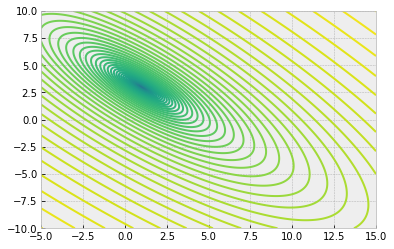

In [3]:
Nx=1000;Ny=1000
x=jnp.linspace(-5,15,Nx)
y=jnp.linspace(-10,10,Ny)

#g=beale(x[:,None]*jnp.ones((Nx,Ny)),y[None,:]*jnp.ones((Nx,Ny)))
g=booth(x[:,None]*jnp.ones((Nx,Ny)),y[None,:]*jnp.ones((Nx,Ny)))
plt.contour(x,y,jnp.log(g.T),levels=100)
#plt.plot([3],[0.5],"+")
#plt.imshow(g)

In [4]:
# loss or objective function
def objective(r):
    f=booth(r[0],r[1])
    return f

In [67]:
from jax import value_and_grad

@jit
def step(t,opt_state):
    value, grads = value_and_grad(objective)(get_params(opt_state))
    opt_state = opt_update(t, grads, opt_state)
    return value, opt_state

def doopt(r0,opt_init,get_params,Nstep):
    opt_state = opt_init(r0)
    xtraj=[r0[0]]
    ytraj=[r0[1]]
    
    for t in range(Nstep):
        value, opt_state = step(t, opt_state)
        p=get_params(opt_state)
        xtraj.append(p[0])
        ytraj.append(p[1])
    return xtraj, ytraj, p

In [68]:
from jax.experimental import optimizers
#adam
opt_init, opt_update, get_params = optimizers.adam(1e0)
r0 = jnp.array([7.5,-7.5])
xtraj1, ytraj1, p=doopt(r0,opt_init,get_params,100)

In [69]:
#sgd
opt_init, opt_update, get_params = optimizers.sgd(1e-1)
r0 = jnp.array([7.5,-7.5])
xtraj2, ytraj2, p=doopt(r0,opt_init,get_params,100)

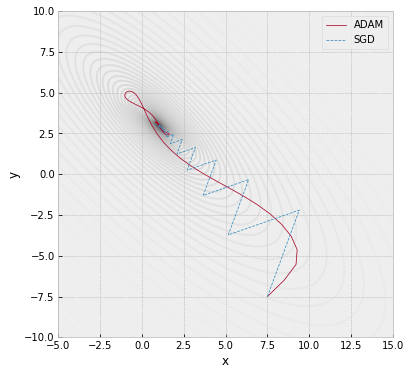

In [71]:
import seaborn as sns
plt.style.use('bmh')

#grid for contour
Nx=1000;Ny=1000
x=jnp.linspace(-5,15,Nx)
y=jnp.linspace(-10,10,Ny)
g=booth(x[:,None]*jnp.ones((Nx,Ny)),y[None,:]*jnp.ones((Nx,Ny)))

fig=plt.figure(figsize=(6,6))
#plt.plot(xtraj1,ytraj1,".",c="C1")
plt.plot(xtraj1,ytraj1,lw=0.75,c="C1",label="ADAM")
#plt.plot(xtraj2,ytraj2,".",c="C0")
plt.plot(xtraj2,ytraj2,lw=0.75,c="C0",ls="dashed",label="SGD")
plt.contour(x,y,jnp.log(g.T),levels=100,cmap="gray",alpha=0.3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("opt1.pdf", bbox_inches="tight", pad_inches=0.0)

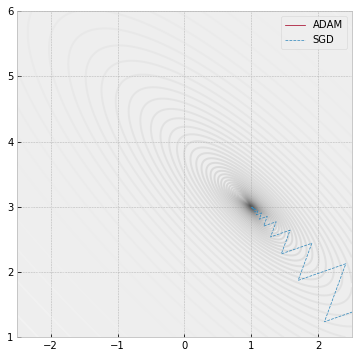

In [66]:
x=jnp.linspace(-2.5,2.5,Nx)
y=jnp.linspace(1,6,Ny)

g=booth(x[:,None]*jnp.ones((Nx,Ny)),y[None,:]*jnp.ones((Nx,Ny)))
fig=plt.figure(figsize=(6,6))
#plt.plot(xtraj1,ytraj1,".",c="C1")
plt.plot(xtraj1,ytraj1,lw=0.75,c="C1",label="ADAM")
#plt.plot(xtraj2,ytraj2,".",c="C0")
plt.plot(xtraj2,ytraj2,lw=0.75,c="C0",ls="dashed",label="SGD")
plt.legend()
plt.xlim(-2.5,2.5)
plt.ylim(1,6)
plt.contour(x,y,jnp.log(g.T),levels=100,cmap="gray",alpha=0.3)
#plt.plot([3],[0.5],"+")

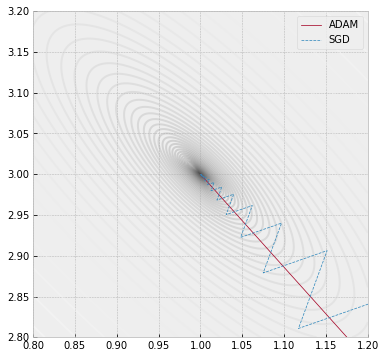

In [29]:
x=jnp.linspace(0.8,1.2,Nx)
y=jnp.linspace(2.8,3.2,Ny)

g=booth(x[:,None]*jnp.ones((Nx,Ny)),y[None,:]*jnp.ones((Nx,Ny)))
fig=plt.figure(figsize=(6,6))
#plt.plot(xtraj1,ytraj1,".",c="C1")
plt.plot(xtraj1,ytraj1,lw=0.75,c="C1",label="ADAM")
#plt.plot(xtraj2,ytraj2,".",c="C0")
plt.plot(xtraj2,ytraj2,lw=0.75,c="C0",ls="dashed",label="SGD")
plt.legend()
plt.xlim(0.8,1.2)
plt.ylim(2.8,3.2)
plt.contour(x,y,jnp.log(g.T),levels=100,cmap="gray",alpha=0.4)